In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
RANDOM_SEED = 6324
np.random.seed(RANDOM_SEED)

In [137]:
keyword = 'N225'
ci_multiplier = 0.2
breakpoint = 96
y = np.array(pd.read_excel('^'+keyword+'.xlsx')['y'])[1:]
y_pred = np.array([float(x) for x in pd.read_csv(keyword+'_Mean.csv').columns])[breakpoint:]
var_pred = np.array([float(x) for x in pd.read_csv(keyword+'_Var.csv').columns])[breakpoint:]

In [138]:
t = list(range(len(y)))
t_test = list(range(breakpoint,len(y)))

In [139]:
from sklearn.metrics import mean_squared_error
import math
y_actual = y[breakpoint:]
y_predicted = y_pred
 
MSE = mean_squared_error(y_actual, y_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

109.01245901057455


In [140]:
upper_bound_unscaled = y_pred + ci_multiplier*var_pred
lower_bound_unscaled = y_pred - ci_multiplier*var_pred
under_upper = upper_bound_unscaled > y_actual
over_lower = lower_bound_unscaled < y_actual
total = (under_upper == over_lower)

print("{} our predictions are in our confidence interval".format(np.mean(total)))

1.0 our predictions are in our confidence interval


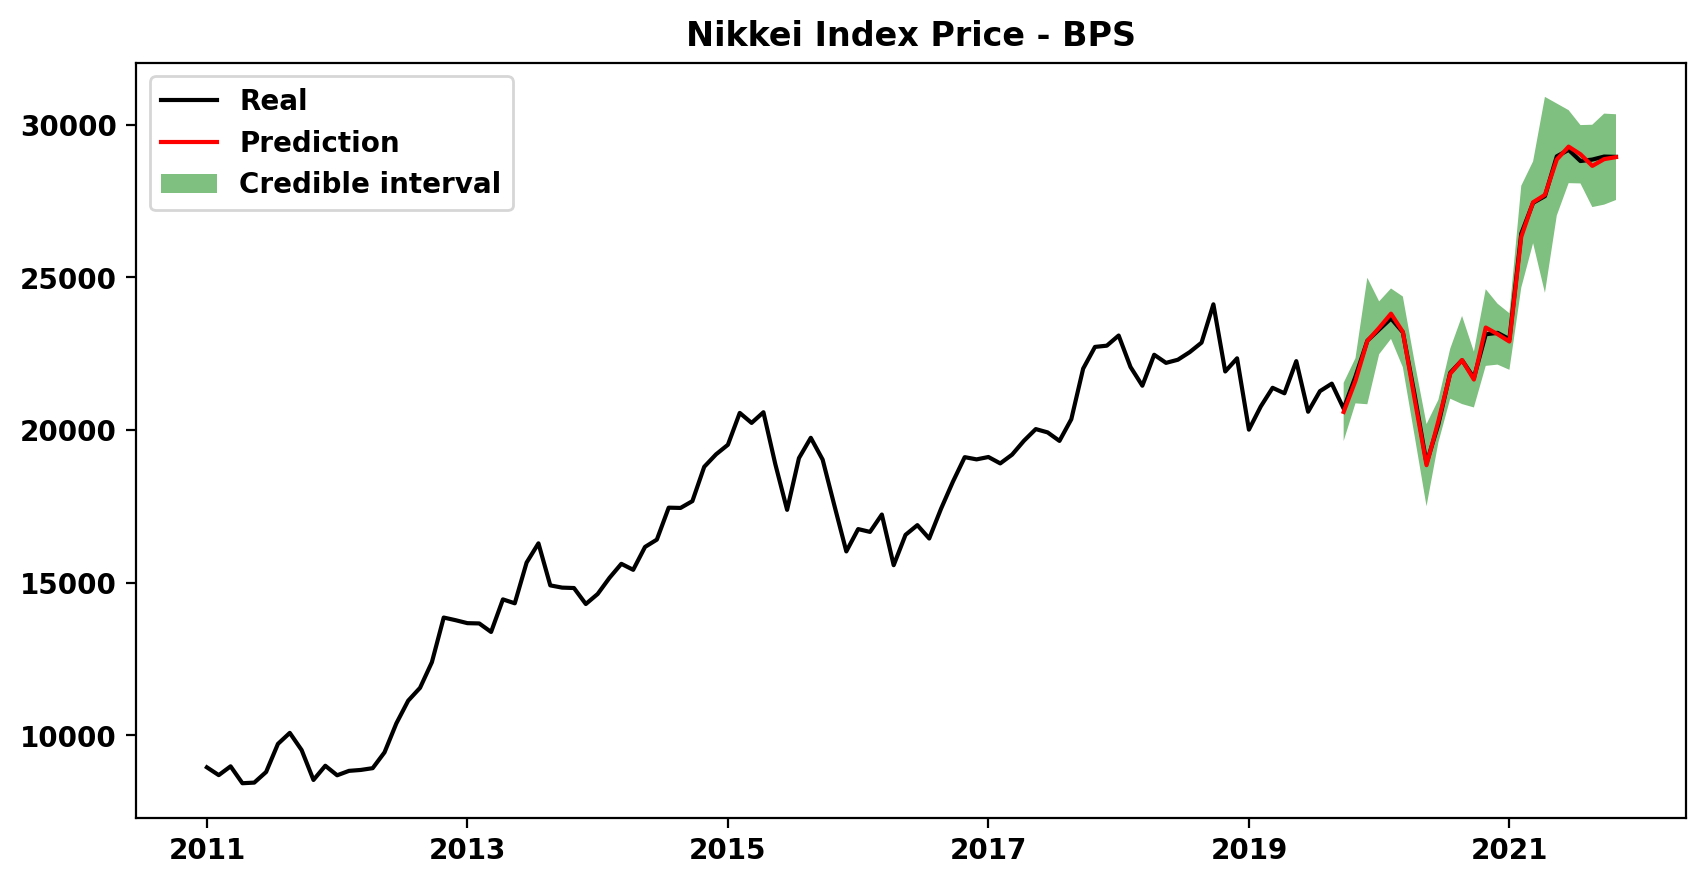

In [142]:
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"}

plt.rcParams.update(params)

plt.title("Nikkei Index Price - BPS")

plt.plot(t,
         y,
         color='black',
         label="Real")

plt.plot(t_test,
         y_pred,
         label="Prediction",
         color="red")

locs, labels = plt.xticks()
plt.xticks([0,22,44,66,88,110],['2011','2013','2015','2017','2019','2021'])

plt.fill_between(x=t_test,
                 y1=upper_bound_unscaled,
                 y2=lower_bound_unscaled,
                 facecolor='green',
                 label="Credible interval",
                 alpha=0.5)

plt.legend(loc=2)